In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [3]:
data=pd.read_csv('상장비상장(2008_2013).csv',header=None,skiprows=1)

In [4]:
X = data.iloc[:,2:37].values
y = data.iloc[:,[37]].values 

In [5]:
train_indices = []
test_indices = []

for index,element in data.iterrows():
    if element[1] == 2013.0:
        test_indices.append(index)
    else:
        train_indices.append(index)
        
train_indices=np.array(train_indices)
train_indices=np.int_(train_indices)
test_indices=np.array(test_indices)
test_indices=np.int_(test_indices)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]  

In [6]:
sm = SMOTE(ratio='auto', kind='regular')
X_train, y_train = sm.fit_sample(X_train,list(y_train))

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [8]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\youngjae.kim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
param_distribs = {'n_estimators': randint(low=10, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}

In [10]:
random_search=RandomizedSearchCV(RandomForestClassifier(class_weight={0:100}), 
                                 param_distributions=param_distribs, cv=5)

In [11]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 100},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BAD7E00F98>, 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [12]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'max_features': 'log2', 'n_estimators': 69}


In [13]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.916


In [14]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.938


In [15]:
Forest=RandomForestClassifier(max_features='log2', n_estimators=400, class_weight={0:10})

In [16]:
Forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 10}, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
pred_train=Forest.predict(X_train)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_train=confusion_matrix(y_train, pred_train)

In [20]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[4983    0]
 [   0 4983]]


In [21]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[961  31]
 [ 27  22]]


In [22]:
pred_test_prob=Forest.predict_proba(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
cfreport=classification_report(y_test, pred_test)

In [25]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
              precision    recall  f1-score   support

        0.0       0.97      0.97      0.97       992
        1.0       0.42      0.45      0.43        49

avg / total       0.95      0.94      0.95      1041



In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt 

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

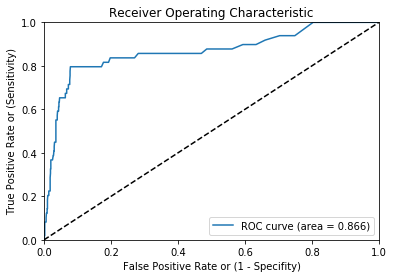

In [28]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")